# Scraping Wellesley College Honor Thesis Data

Author: Andrea Mock


In [1]:
#import chrome webdriver
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [1]:
import pandas as pd

# import for plotting later
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [61]:
browser = webdriver.Chrome(ChromeDriverManager().install())
browser.get('https://repository.wellesley.edu/collections/thesiscollection?display=grid')

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/87.0.4280.88/chromedriver_mac64.zip


[WDM] - Driver has been saved in cache [/Users/andreamock/.wdm/drivers/chromedriver/mac64/87.0.4280.88]


In [120]:
def getThesisData(index):
    if index == 0:
        browser.get('https://repository.wellesley.edu/collections/thesiscollection?display=grid')
    else:
        browser.get('https://repository.wellesley.edu/collections/thesiscollection?' + 'page=' +str(index) + 'display=grid')
    thesis = browser.find_elements_by_xpath('//div[@class="solr-fields islandora-inline-metadata col-xs-12 col-sm-8 col-md-9"]')
    links = browser.find_elements_by_xpath('//div[@class="fa fa-file-text-o thesis datastream-thumbnail"]/a')
    links_list = [link.get_attribute('href') for link in links]
    return links_list

In [121]:
def getAllThesisLinks():
    allLinks = []
    for i in range(34):
        currentPage = getThesisData(i)
        allLinks += currentPage
    return allLinks

In [122]:
allLinks = getAllThesisLinks()

In [136]:
allLinks[100]

'https://repository.wellesley.edu/object/ir800'

In [127]:
browser.get(allLinks[1])

In [138]:
browser.find_elements_by_xpath('//div[@class="mods-abstract-ms field-value col-xs-8 no-gutter-right"]')[0].text

'In this work, I examine the case of Japan and how the Japanese state utilized public art museums in the 1980s and early 1990s to shift their national image to that of a "nation-state of culture" (bunka kokka). Museums, especially public ones, are politically implicated institutions. Contrary to their appearance of permanence and insulation, museums are reflective of larger political, economic, and social changes in a society. Drawing upon the theories of Carol Duncan, Pierre Bourdieu, and Tony Bennett, this thesis examines art museums as institutions that facilitate identity and image-formation. Essentially, there are two related types of formations at questions here—the first is how nation-states use museums to shape their national identity and international image, and the second is how individuals form their own social and cultural identity through encounters with the museum. This thesis lies at the intersection of politics, sociology, cultural studies, and museum studies. In this w

In [157]:
def getPageInfo(link):
    """
    given the link for a thesis page, retrieves the data from 
    """
    browser.get(link)
    title = browser.find_elements_by_xpath('//h1[@class="page-header"]')
    author = browser.find_elements_by_xpath('//div[@class="mods-name-personal-creator-namepart-ms field-value col-xs-8 no-gutter-right"]')
    dept = browser.find_elements_by_xpath('//div[@class="mods-name-corporate-department-namepart-ms field-value col-xs-8 no-gutter-right"]')
    date = browser.find_elements_by_xpath('//div[@class="mods-origininfo-type-displaydate-dateother-ms field-value col-xs-8 no-gutter-right"]')
    advisor = browser.find_elements_by_xpath('//div[@class="mods-name-personal-advisor-namepart-ms last field-value col-xs-8 no-gutter-right"]')
    abstract =browser.find_elements_by_xpath('//div[@class="mods-abstract-ms field-value col-xs-8 no-gutter-right"]')
    data_list = [title,author,dept,date,advisor, abstract]
    info_list = []
    for item in data_list:
        try:
            info_list.append(item[0].text)
        except:
            info_list.append(None)
    return info_list

In [171]:
def saveInformation(links):
    return [getPageInfo(link) for link in links]

In [172]:
allInformation = saveInformation(allLinks)

In [173]:
thesis_df = pd.DataFrame(allInformation, columns=['title', 'author', 'dept', 'year','advisor', 'abstract'])
thesis_df

,title,author,dept,year,advisor,abstract
0,Unilateral Friendship Outcomes and Preschool F...,"Wong, Maile",Psychology,2015,None,None
1,Beyond Prosthetics: the First Steps Towards Id...,"Chou, Jacquelyn",Biological Sciences,2015,"Suzuki, Yuichiro",None
2,"Filling Political Spaces: Iraqi, Humanitarian-...","Seymour, Jillian",Political Science,2015,None,None
3,True Fiction: Three Writers' Approaches to Fac...,"Krauthamer, Anna",English,2015,"Chiasson, Dan",This thesis examines how three writers challen...
4,"The Making of a Mountain: Mount Fuji, Miniatur...","Scoble, Emily",East Asian Languages and Literatures,2015,"Goree, Robert",None
...,...,...,...,...,...,...
654,"Piratical Debauchery, Homesick Sailors, and Na...","Riedler, Pallas",Music,2017,"Bhogal, Gurminder Kaur",None
655,Experimental investigation of phytoliths and c...,"Oppenheim, Georgia",Anthropology,2020,"Van Arsdale, Adam\nMinor, Elizabeth",The Cooking Hypothesis proposes that morpholog...
656,Synthesis of Canavanine Diamide as a Potential...,"Thomas, Vienna",Chemistry,2020,"Elmore, Donald E.\nRaines, Ronald T.",Cell-Penetrating Peptides (CPPs) are a promisi...
657,The Erotics of Imperialism: 5th Century Litera...,"Gonzalez, Sarah",Classical Studies,2020,"Gilhuly, Kate\nDougherty, Carol\nCain, William",Through a literary analysis of Euripides' Hele...


In [174]:
# save thesis information to csv file 
thesis_df.to_csv('thesis_info.csv')

In [6]:
thesis_df = pd.read_csv('thesis_info.csv', index_col=0)

In [7]:
def cleanAdvisor(advisor):
    """
    give a persons advisor data, if the person has multiple advisors returns a list of advisors
    """
    if advisor != None and type(advisor) != float:
        return advisor.split('\n')
    return []

In [8]:
thesis_df['advisor_clean'] = thesis_df['advisor'].apply(cleanAdvisor)

In [9]:
list_dept = list(thesis_df['dept'].apply(cleanAdvisor))

In [10]:
from collections import Counter

In [11]:
all_dept = [item for sublist in list_dept for item in sublist]

In [12]:
thesis_dept = pd.DataFrame(Counter(all_dept).most_common(20), columns=['dept','count'])
thesis_dept

,dept,count
0,English,63
1,Political Science,49
2,Economics,48
3,Chemistry,42
4,Art,34
5,Biological Sciences,30
6,Neuroscience,30
7,Psychology,29
8,Biological Chemistry,28
9,Mathematics,25


In [13]:
def plotInfo(dataframe, title, x_axis, plot_color='salmon', hplot=True):
    """
    plots information from a dataframe, with a given color, title and x-axis 
    """

    fig, ax = plt.subplots(figsize=(8, 8))
    
    if hplot == True:
        # Plot horizontal bar graph
        dataframe.sort_values(by='count').plot.barh(x=x_axis,
                      y='count',
                      ax=ax,
                      color=plot_color)
    else:
        dataframe.sort_values(by='count').plot.bar(x=x_axis,
                      y='count',
                      ax=ax,
                      color=plot_color)

    ax.set_title(title)

    plt.show()

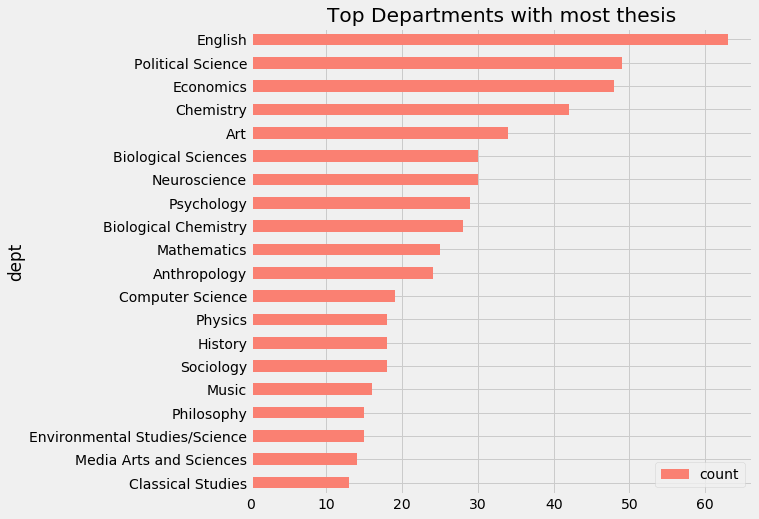

In [14]:
plotInfo(thesis_dept, 'Top Departments with most thesis', 'dept')

Now we can also take the distribution of thesis by year: 

In [19]:
#unique years 
thesis_df['year'].unique()

array([2015, 2016, 2017, 2018, 2012, 2014, 2019, 2020, 2013, 1994])

In [42]:
# thesis by year
thesisByYear = pd.DataFrame(thesis_df['year'].value_counts())
thesisByYear

,year
2016,84
2012,84
2014,79
2013,78
2017,73
2015,73
2018,68
2019,63
2020,56
1994,1


Now lets not just take a look at the years but also the computer science thesis and advisors:

In [45]:
# number of unique advisors
len(thesis_df['advisor'].unique())

408

In [51]:
# most popular advisors 
pd.DataFrame(Counter(thesis_df['advisor']).most_common(20)[1:], columns=['advisor','count'])

,advisor,count
0,"Suzuki, Yuichiro",7
1,"Quintana, Ryan",7
2,"Wall-Randell, Sarah",6
3,"Armstrong, Justin",6
4,"Sides, Marilyn",6
5,"Rutherford, Markella",6
6,"Turbak, Franklyn",6
7,"Hickey, Alison",5
8,"Cain, William",5
9,"Murphy, Craig",4


In [55]:
# all CS Thesis
cs_thesis = thesis_df[thesis_df['dept'] == 'Computer Science']
cs_thesis

,title,author,dept,year,advisor,abstract,advisor_clean
18,Privacy Implications of New York City's Stop-a...,"Manfredi, Veronica",Computer Science,2015,"Mir, Darakhshan",A wider release of police datasets could enabl...,"[Mir, Darakhshan]"
106,Evaluation of Dynamic Binary Instrumentation A...,"Zhao, Valerie",Computer Science,2018,"Wood, Benjamin P.","From web browsing to bank transactions, to dat...","[Wood, Benjamin P.]"
110,adVantage -- Seeing the Universe: How Virtual ...,"McNair, Eliza",Computer Science,2018,"Anderson, Scott D.\nWatters, Wesley Andrés","This thesis introduces the ""adVantage - Seeing...","[Anderson, Scott D., Watters, Wesley Andrés]"
177,Computational Thinking and Technology Toys,"Lin, Veronica J",Computer Science,2015,"Shaer, Orit",Computational thinking is an increasingly popu...,"[Shaer, Orit]"
212,Suggested Blocks: Using Neural Networks To Aid...,"Svanberg, Maja Susanna",Computer Science,2018,"Turbak, Franklyn",MIT App Inventor is a programming environment ...,"[Turbak, Franklyn]"
261,The Challenges of Algorithmically Assigning Fa...,"Lurie, Emma",Computer Science,2019,"Mustafaraj, Eni",In the era of misinformation and machine learn...,"[Mustafaraj, Eni]"
296,"The Design and Implementation of Venbrace, a T...","Huang, Ruanqianqian",Computer Science,2020,"Turbak, Franklyn",Blocks programming environments (BPEs) lower b...,"[Turbak, Franklyn]"
301,Where Political News and Algorithms Meet: A Lo...,"Umarova, Khonzodakhon",Computer Science,2020,"Mustafaraj, Eni","Over the years, Google has become a very impor...","[Mustafaraj, Eni]"
311,Spatio-Temporal Analysis and Simulation of Hum...,"Li, Huihan",Computer Science,2020,"Bassem, Christine",With the rapid development of mobile technolog...,"[Bassem, Christine]"
398,Improving the Usability of App Inventor throug...,"Chadha, Karishma",Computer Science,2014,"Turbak, Franklyn","In blocks programming, users compose programs ...","[Turbak, Franklyn]"


In [65]:
csThesisCounter = Counter(cs_thesis['year'])
csThesisCounter

Counter({2015: 4,
         2018: 3,
         2019: 1,
         2020: 3,
         2014: 2,
         2016: 1,
         2012: 2,
         2017: 1})

We are also interested in exploring what the topics are that students write their thesis about. To do so we create a wordCloud of words included in a students abstract.

In [75]:
def createAbstractString(all_thesis):
    thesisString = ''
    for thesis in all_thesis:
        if thesis != None and type(thesis) != float:
            thesisString += " " + thesis
    return thesisString

In [77]:
thesisString = createAbstractString(cs_thesis['abstract'])
thesisString[:100] # string with all abstract descritions

' A wider release of police datasets could enable social scientists, community activists, and civil l'

In [67]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [68]:
def updateStopWords(lang, wordSet=set()):
    """ 
     takes two parameters, the name of a language and a set of additional stopwords we would like to consider
    """
    stopwords = nltk.corpus.stopwords.words(lang)
    newStopWords = wordSet
    stopwords.extend(wordSet)
    return stopwords

In [80]:
def createWordCloud(text, stopwords, widthImg, heightImg, backgroundCol, colormap):
    """
     takes several parameters: the text as a string, the set of stopwords, 
     the filename to save the wordcloud image, the size of the image (width and height), 
     max number of words, background color, and a colormap. 
     The function displays the wordcloud and saves it as a PNG file.
    """
    wordcloud = WordCloud(width = widthImg, height = heightImg, 
                background_color =backgroundCol, 
                stopwords = stopwords, colormap = colormap,
                min_font_size = 10).generate(text) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

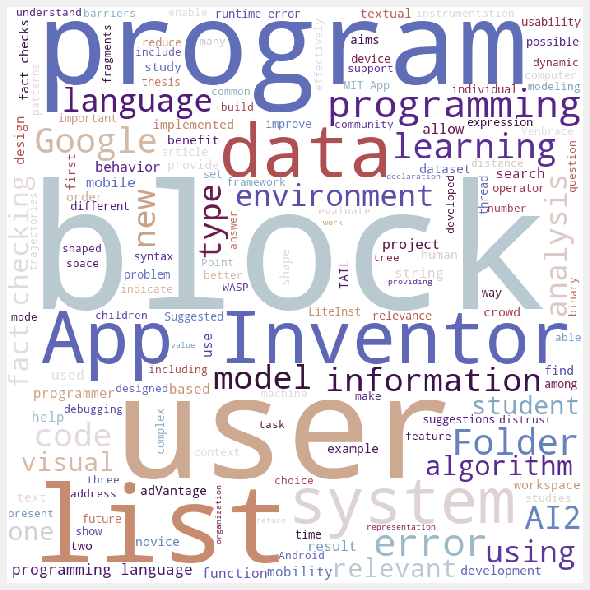

In [81]:
createWordCloud(thesisString, STOPWORDS, 700, 700, 'white', "twilight")

We can also look at the thesis topics and see if there are different words that pop up in a wordcloud:

In [82]:
thesisTitleString = createAbstractString(cs_thesis['title'])
thesisTitleString[:200]

" Privacy Implications of New York City's Stop-and-Frisk Data Evaluation of Dynamic Binary Instrumentation Approaches: Dynamic Binary Translation vs. Dynamic Probe Injection adVantage -- Seeing the Uni"

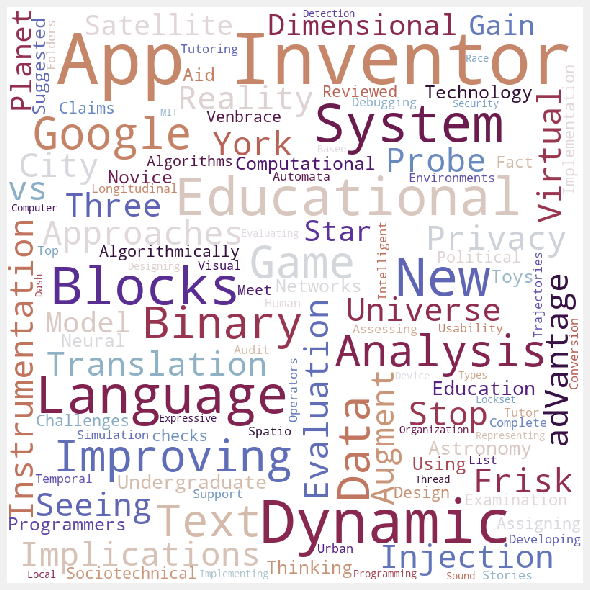

In [84]:
createWordCloud(thesisTitleString, STOPWORDS, 800, 800, 'white', "twilight")